In [59]:
pip install tensorflow==1.10

In [0]:
import tensorflow as tf


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [0]:
# We use the Sequential model in keras which is used 99% of the time 
model = tf.keras.Sequential() 
# We add our first convolutional layer with 32 neurons and filter size of 3 x 3
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
# We add our max pooling layer 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#We add a second convolutional layer 
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
# Our dropout layer 
model.add(tf.keras.layers.Dropout(0.25)) 
# A fully connected layer 
model.add(tf.keras.layers.Dense(128, activation='relu')) 
# Another dropout layer with more dropouts 
model.add(tf.keras.layers.Dropout(0.5)) 
# We flatten the features 
model.add(tf.keras.layers.Flatten()) 
# We add an output layer that uses softmax activation for the 10 classes 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adadelta(), metrics=['accuracy'])


In [70]:
themodel=model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0611 - acc: 0.9811 - val_loss: 0.0383 - val_acc: 0.9866
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0516 - acc: 0.9844 - val_loss: 0.0335 - val_acc: 0.9878
Epoch 3/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0455 - acc: 0.9856 - val_loss: 0.0349 - val_acc: 0.9874
Epoch 4/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0413 - acc: 0.9867 - val_loss: 0.0289 - val_acc: 0.9902
Epoch 5/10
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0373 - acc: 0.9887 - val_loss: 0.0271 - val_acc: 0.9903
Epoch 6/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0339 - acc: 0.9898 - val_loss: 0.0286 - val_acc: 0.9894
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0322 - acc: 0.9903 - val_loss: 0.0280 - 

In [71]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.02387358154144458
Test accuracy: 0.9917


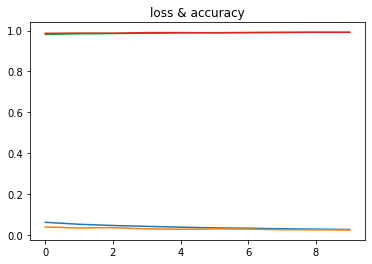

In [72]:
plt.title('loss & accuracy')
plt.plot(themodel.history['loss'], label='Train')
plt.plot(themodel.history['val_loss'], label='Test')
plt.plot(themodel.history['acc'], label='Train')
plt.plot(themodel.history['val_acc'], label='Test')
plt.show()

In [0]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

Confusion Matrix
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1133    1    0    0    0    1    0    0    0]
 [   1    3 1023    2    0    0    0    3    0    0]
 [   0    0    0 1006    0    2    0    0    2    0]
 [   0    0    0    0  976    0    1    0    1    4]
 [   0    0    0    6    0  885    1    0    0    0]
 [   7    3    0    0    1    5  942    0    0    0]
 [   0    4    2    2    1    0    0 1017    1    1]
 [   2    0    2    1    1    1    0    0  965    2]
 [   1    1    0    1    3    5    0    4    2  992]]
Confusion matrix, without normalization
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1133    1    0    0    0    1    0    0    0]
 [   1    3 1023    2    0    0    0    3    0    0]
 [   0    0    0 1006    0    2    0    0    2    0]
 [   0    0    0    0  976    0    1    0    1    4]
 [   0    0    0    6    0  885    1    0    0    0]
 [   7    3    0    0    1    5  942    0    0    0]
 [   0    4    2    2    1    0    0 1017

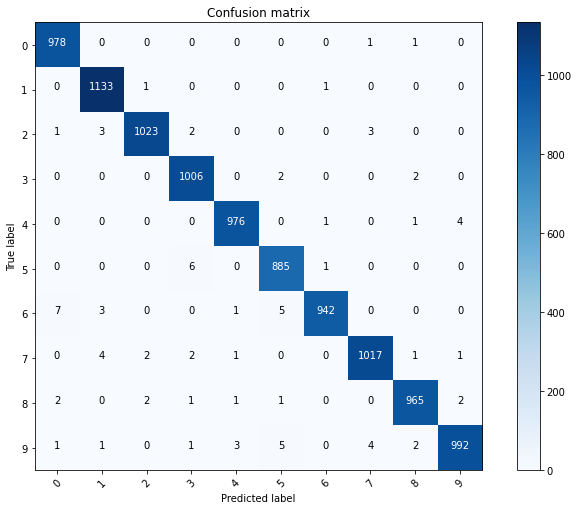

In [74]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=45)
    plt.yticks(tick_marks)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
pred = model.predict(x_test)
cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
print("Confusion Matrix")
print(cm)
plot_confusion_matrix(cm)